# Trabalho 1 (T1)

O trabalho 1 consiste em explorar um conjunto de dados de doenças cardíacas (arquivo `heart.csv`). O trabalho deve ser relizado em **duplas**.


O conjunto de dados de doenças cardíacas é formado por 302 observações (instâncias) e contém o seguintes atributos (todos numéricos):
- age: age in years
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0 (0 = no presense of heard disease; 1 = presence of heart disease)

Nas células abaixo deste notebook existem questões específicas sobre o conjunto de dados que devem ser respondidas.

**Não é permitido importar nenhum módulo além dos que estão importados na célula abaixo!!**

### Entrega

Após responder todas as questões, vocês devem certificar que seu jupyter notebook está salvo com suas alterações (basta pressionar `ctrl + s` para salvar). Após salvar suas alterações, vocês devem realizar a entrega na sala de entrega do moodle. A entrega deve ser feita da seguinte maneira:
- Deve ser entregue um arquivo `zip` contendo este jupyter notebook (Trabalho_1.ipynb) com as questões respondidas. O nome do arquivo deve seguir o padrão: `NomeSobrenome_NomeSobrenome.zip`

**Apenas um aluno da dupla deve fazer a entrega!!**


### Critérios de avaliação

Cada questão será avaliada de acordo com os seguintes critérios:

- Resolver o problema proposto: 7,0 pts
- Utilizar código vetorizado: 2,0 pts
- Escrever código simples e legível: 1,0 pt

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Questão 1 (3,0 pts)

Você deve ler o arquivo `heart.csv` e imprimir os seguintes dados sobre cada atributo (exceto o atributo alvo/target):
- Valor mínimo e máximo de cada atributo.
- Valor médio de cada atributo.
- Desvio padrão de cada atributo.
- Mediana de cada atributo.

Função do Numpy para ler arquivos csv: [https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)

In [2]:
########################
# Inicio do seu codigo #
########################
dataset = np.loadtxt('heart.csv', delimiter=',', dtype=np.unicode)

header = dataset[0, :] # separando o header
content = dataset[1:, :-1].astype(np.float32) # separando o conteúdo
target = dataset[1:, -1].astype(np.int32) # separando o target
print(header)

min_ = np.min(content, axis=0)
max_ = np.max(content, axis=0)
mean = np.mean(content, axis=0)
std = np.std(content, axis=0)
median = np.median(content, axis=0)

for i in range(content.shape[1]):
    print('Atributo: {}, min: {:.4f}, max: {:.4f}, mean: {:.4f}, std: {:.4f}, median: {:.4f}'.format(header[i], min_[i],
                                                                               max_[i], mean[i], std[i], median[i]))

########################
#   Fim do seu codigo  #
########################

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']
Atributo: age, min: 29.0000, max: 77.0000, mean: 54.3663, std: 9.0671, median: 55.0000
Atributo: sex, min: 0.0000, max: 1.0000, mean: 0.6832, std: 0.4652, median: 1.0000
Atributo: cp, min: 0.0000, max: 3.0000, mean: 0.9670, std: 1.0303, median: 1.0000
Atributo: trestbps, min: 94.0000, max: 200.0000, mean: 131.6238, std: 17.5092, median: 130.0000
Atributo: chol, min: 126.0000, max: 564.0000, mean: 246.2640, std: 51.7452, median: 240.0000
Atributo: fbs, min: 0.0000, max: 1.0000, mean: 0.1485, std: 0.3556, median: 0.0000
Atributo: restecg, min: 0.0000, max: 2.0000, mean: 0.5281, std: 0.5250, median: 1.0000
Atributo: thalach, min: 71.0000, max: 202.0000, mean: 149.6469, std: 22.8673, median: 153.0000
Atributo: exang, min: 0.0000, max: 1.0000, mean: 0.3267, std: 0.4690, median: 0.0000
Atributo: oldpeak, min: 0.0000, max: 6.2000, mean: 1.0396, std: 1.1592, median: 0.8000
Atributo: s

## Questão 2 (3,0 pts)

Você deve realizar as seguintes operações sobre os atributos idade (age) e colesterol (chol):
1. Plotar um gráfico de dispersão com o atributo colesterol no eixo X e a idade no eixo Y. Utilize o atributo target para colorir os pontos de acordo com a sua classe.
2. Normalize os atributos idade (age) e colesterol (chol) utilizando a estratégia MinMax. A normalização MinMax é dada pela fórmula abaixo:
$$x^{(i)}_{norm}=\frac{x^{(i)} - x^{(i)}_{min}}{x^{(i)}_{max} - x^{(i)}_{min}}$$

Onde $x^{(i)}_{norm}$ é o atributo $x^{(i)}$ do conjunto de dados normalizado.

3. Após normalizar os atributos, faça a plotagem do passo 1 novamente, agora os atributos normalizados.

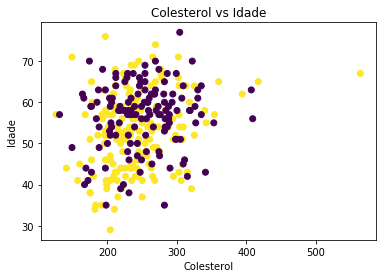

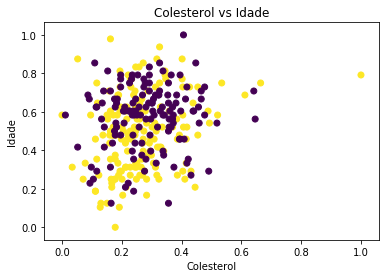

In [3]:
########################
# Inicio do seu codigo #
########################
age = content[:, 0]
chol = content[:, 4]
plt.title('Colesterol vs Idade')
plt.scatter(chol, age, c=target)
plt.xlabel('Colesterol')
plt.ylabel('Idade')
plt.show()


age = (age - age.min()) / (age.max() - age.min())
chol = (chol - chol.min()) / (chol.max() - chol.min())
plt.title('Colesterol vs Idade')
plt.scatter(chol, age, c=target)
plt.xlabel('Colesterol')
plt.ylabel('Idade')
plt.show()
########################
#   Fim do seu codigo  #
########################

## Questão 3 (2,0 pts)

Responda as perguntas abaixo sobre o conjunto de dados:

1. Quantas das pessoas do conjunto de dados apresentam doença no coração?
2. Quantas mulheres apresentam doença no coração?
3. Quantos homens apresentam doença no coração?
4. Quantos homens tem dores no peito (`cp`) do tipo 2 ou do tipo 3?


In [4]:
########################
# Inicio do seu codigo #
########################
print('1. Número total de pessoas que apresentam doença no coração:', np.sum(target))
mask_m = content[:, 1] == 0
print('2. Número total de mulheres que apresentam doença no coração:', np.sum(target[mask_m]))
mask_h = content[:, 1] == 1
print('3. Número total de homens que apresentam doença no coração:', np.sum(target[mask_h]))

h_cp = content[mask_h, 2] # selecionando somente os homens com dores no peito

print('4. Número total de homens que apresentam dor no peito do tipo 2 ou 3:', np.sum((h_cp == 2) | (h_cp == 3)))

########################
#   Fim do seu codigo  #
########################

1. Número total de pessoas que apresentam doença no coração: 165
2. Número total de mulheres que apresentam doença no coração: 72
3. Número total de homens que apresentam doença no coração: 93
4. Número total de homens que apresentam dor no peito do tipo 2 ou 3: 71


## Questão 4 (2,0 pts)

Faça dois graficos que pizza (*pie chart*) que contêm os tipos de dores no peito (`ch`) com o tipo de dor (0, 1, 2, 3) e a frequência. Faça um plot para homens e outro para mulheres.

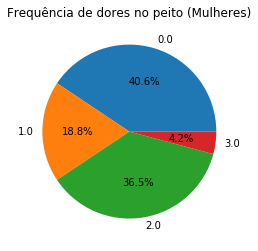

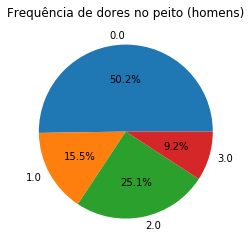

In [5]:
########################
# Inicio do seu codigo #
########################
mask_m = content[:, 1] == 0
cp_m = content[mask_m, 2] # selecionando somente as mulheres com dores no peito
unique, counts = np.unique(cp_m, return_counts=True)
plt.title('Frequência de dores no peito (Mulheres)')
plt.pie(counts, labels=unique, autopct='%1.1f%%')
plt.show()


mask_h = content[:, 1] == 1
cp_h = content[mask_h, 2] # selecionando somente os homens com dores no peito
unique, counts = np.unique(cp_h, return_counts=True)
plt.title('Frequência de dores no peito (homens)')
plt.pie(counts, labels=unique, autopct='%1.1f%%')
plt.show()


########################
#   Fim do seu codigo  #
########################